In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/FINAL data-2.csv')

FileNotFoundError: ignored

In [ ]:
df.head()

,Date,Time,Year,Month,Day,Hour,Min,Second,latitude,longitude,depth,mag,magType,place,depthError,magError
0,11-05-1905,17:9:1.46,1905,5,11,17,9,1.46,25.967,143.332,15.0,6.78,mw,"Volcano Islands, Japan region",25.0,0.20
1,02-06-1905,5:39:39.6,1905,6,2,5,39,39.60,33.715,131.759,60.0,6.91,mw,"31 km SSW of Hikari, Japan",15.4,0.53
2,06-07-1905,16:20:46.93,1905,7,6,16,20,46.93,38.417,144.119,15.0,7.67,mw,"217 km ESE of Kamaishi, Japan",25.0,0.20
3,21-01-1906,13:49:33.57,1906,1,21,13,49,33.57,34.175,138.025,300.0,7.40,mw,"50 km SSW of ?yama, Japan",25.0,0.30
4,24-02-1906,0:13:40.73,1906,2,24,0,13,40.73,34.633,141.424,15.0,6.25,mw,"116 km ESE of Katsuura, Japan",15.9,0.20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39747 entries, 0 to 39746
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        39747 non-null  object 
 1   Time        39747 non-null  object 
 2   Year        39747 non-null  int64  
 3   Month       39747 non-null  int64  
 4   Day         39747 non-null  int64  
 5   Hour        39747 non-null  int64  
 6   Min         39747 non-null  int64  
 7   Second      39747 non-null  float64
 8   latitude    39747 non-null  float64
 9   longitude   39747 non-null  float64
 10  depth       39747 non-null  float64
 11  mag         39747 non-null  float64
 12  magType     39747 non-null  object 
 13  place       39650 non-null  object 
 14  depthError  20417 non-null  float64
 15  magError    15516 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 4.9+ MB


In [ ]:
#window_size = 4
#rolling_mean = df1['sum'].rolling(window=window_size).mean()
#df1['rolling_mean'] = rolling_mean

# Make predictions by shifting the rolling mean values one time step forward
#predictions = rolling_mean.shift(1)
#df1['predictions'] = predictions

# Calculate the mean squared error between the predicted values and the actual values
#rmse = np.sqrt(np.mean((predictions[window_size:] - df1['sum'][window_size:]) ** 2))

#print('Root Mean Squared Error:', rmse)
#df1

In [ ]:
df_new = df[['Year', 'mag']]

In [ ]:
df_new.head()

,Year,mag
0,1905,6.78
1,1905,6.91
2,1905,7.67
3,1906,7.40
4,1906,6.25


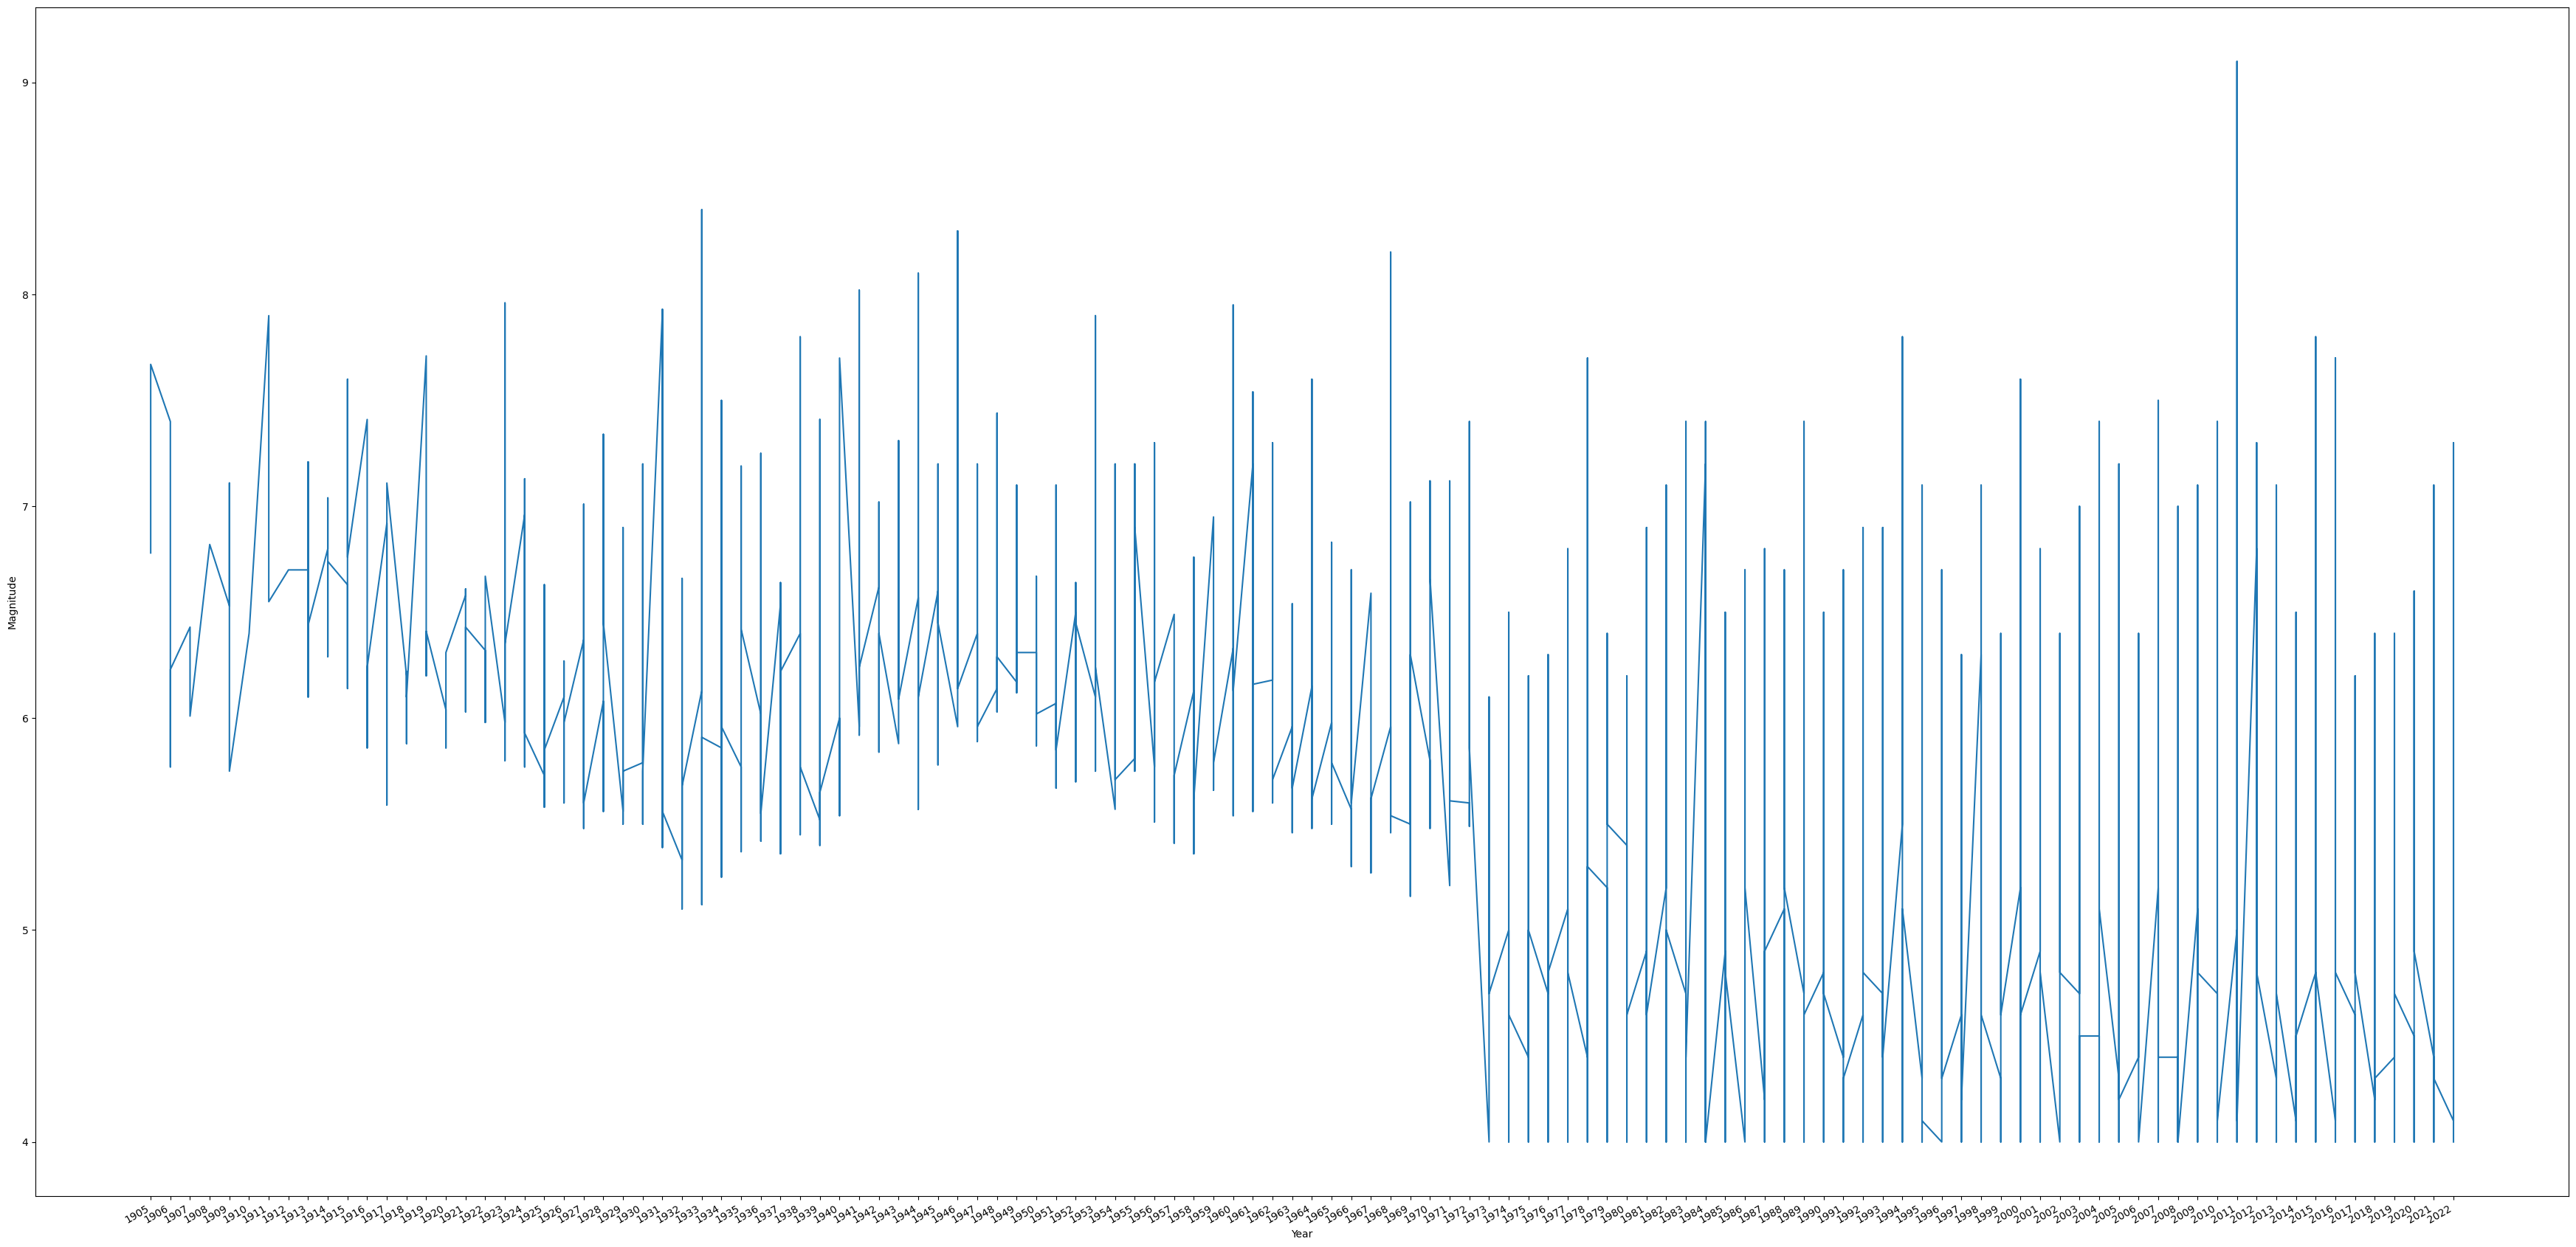

In [ ]:



fig, ax = plt.subplots(figsize=(35, 17))

# Create a line plot for 'mag' values
ax.plot(df_new['Year'], df_new['mag'])
ax.set_xlabel('Year')
ax.set_ylabel('Magnitude')

# Customize x-axis ticks
plt.xticks(df_new['Year'].unique(), rotation=45)

fig.autofmt_xdate()
plt.tight_layout()



# Show the plot (optional)
plt.show()

#This code will generate a line plot for the "mag" values over the years specified in your dataset and save the figure as 'CH04_F01_peixeiro.png' with the specified DPI. You can adjust the dataset as needed, and the code will adapt accordingly.


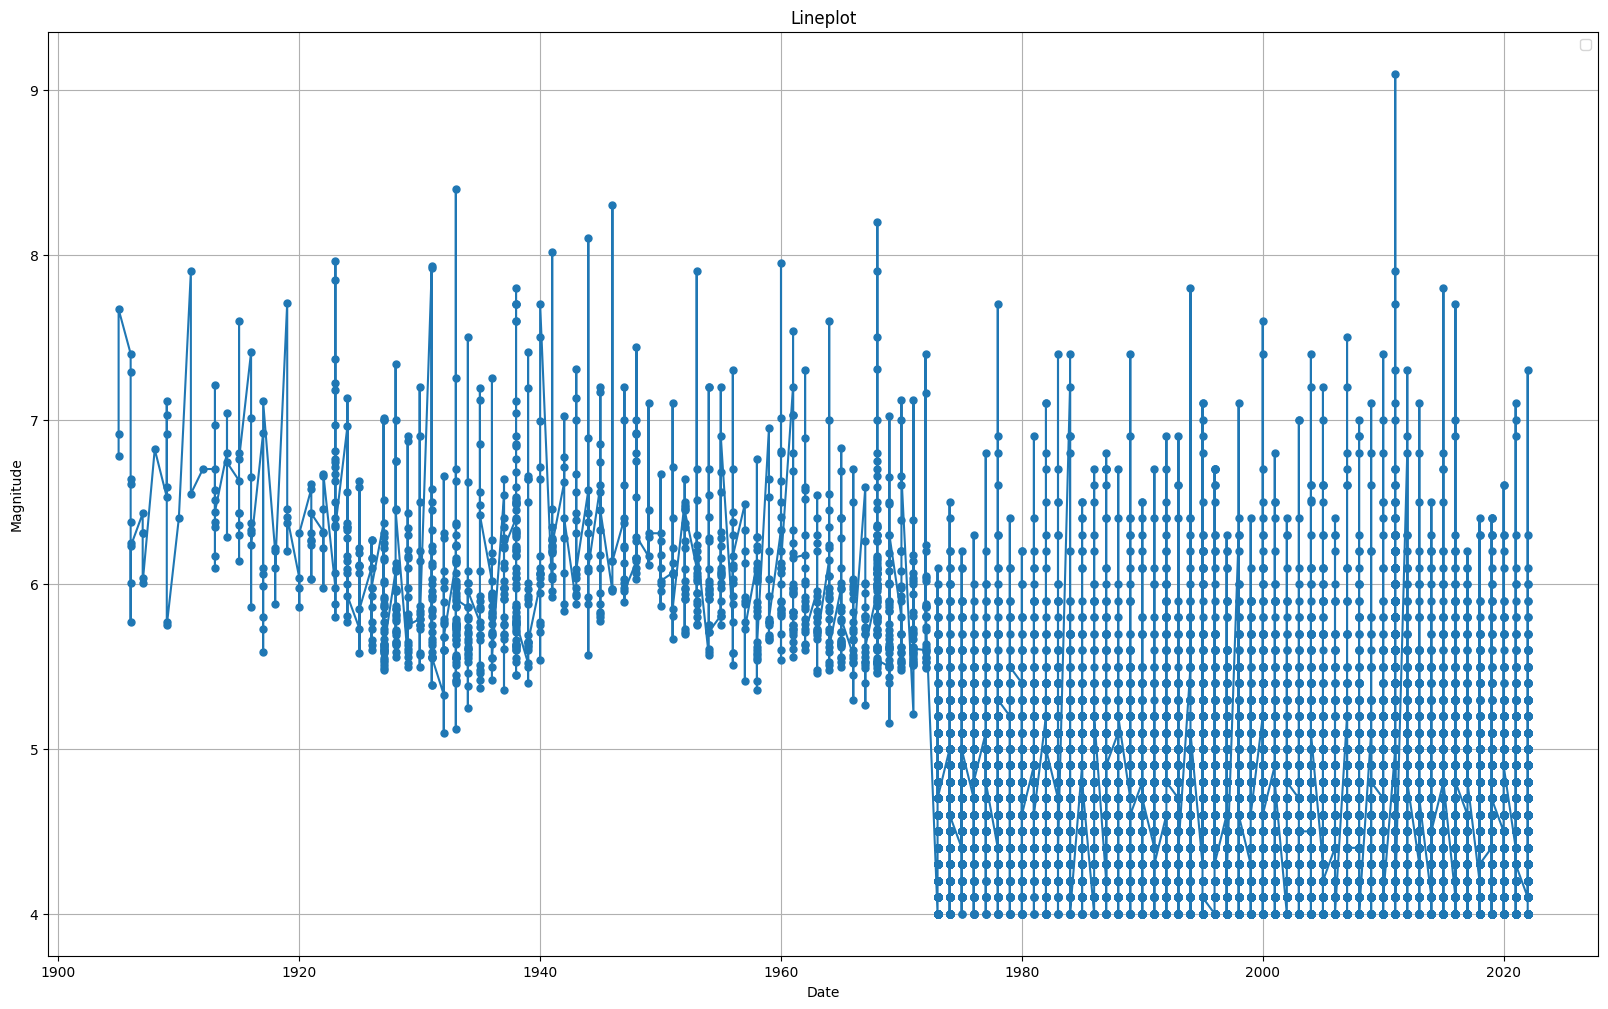

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(df_new['Year'], df_new['mag'], marker='o', markersize=5)

plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Lineplot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd


In [ ]:
ADF_result = adfuller(df['mag'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')


ADF Statistic: -8.244710987764162
p-value: 5.594332382326429e-13


Here we see a more negative result for ADF which is a good sign for time series being stationary and our p-value is 5.58 x 10^(-13) which states that our time series is stationary

P_value became exactly an ideal state that should not exist

<Figure size 2500x1200 with 0 Axes>

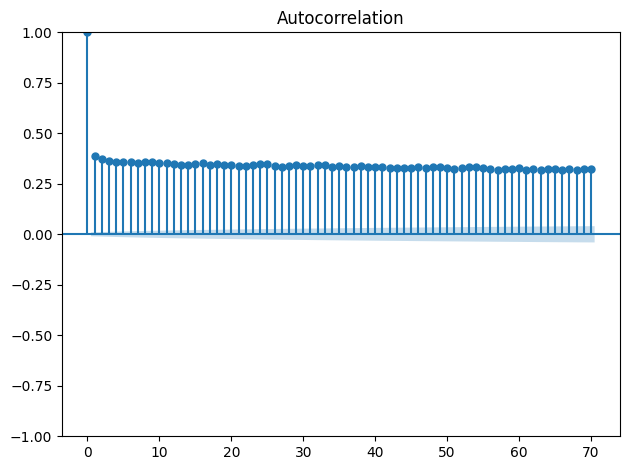

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(25, 12))

plot_acf(df_new['mag'], lags=70);
plt.tight_layout()

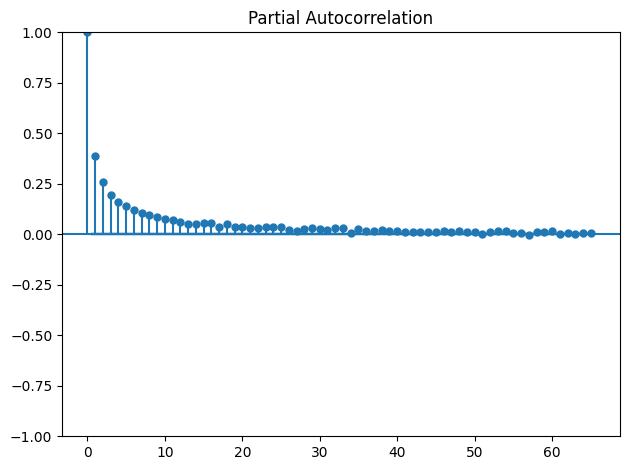

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_new['mag'], lags=65)
plt.tight_layout()

To apply a moving average to predict the magnitude in terms of year

In [ ]:
import pandas as pd

# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate moving average by grouping data by year
window_size = 3  # Adjust the window size as needed
df['MovingAvgMag'] = df.groupby(df.index.year)['mag'].rolling(window_size, min_periods=1).mean().reset_index(0, drop=True)

# Reset the index
df.reset_index(inplace=True)

# Print the DataFrame with the added 'MovingAvgMag' column
print(df[['Date', 'mag', 'MovingAvgMag']])


<ipython-input-5-1a2d85b915f4>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


            Date   mag  MovingAvgMag
0     1905-11-05  6.78      6.780000
1     1905-02-06  6.91      6.845000
2     1905-06-07  7.67      7.120000
3     1906-01-21  7.40      7.400000
4     1906-02-24  6.25      6.825000
...          ...   ...           ...
39742 2022-12-30  4.20      4.200000
39743 2022-12-30  4.40      4.200000
39744 2022-12-30  4.40      4.333333
39745 2022-12-31  4.50      4.433333
39746 2022-12-31  4.00      4.300000

[39747 rows x 3 columns]


Visualizing it and comparing with the actual magnitude

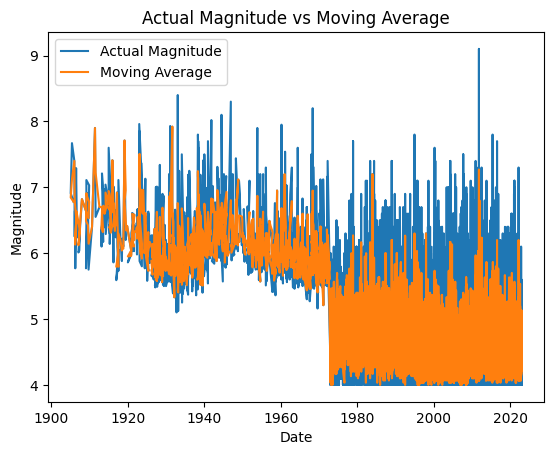

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual magnitudes
plt.plot(df['Date'], df['mag'], label='Actual Magnitude')

# Plotting the moving average values
plt.plot(df['Date'], df['MovingAvgMag'], label='Moving Average')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Actual Magnitude vs Moving Average')
plt.legend()

# Display the plot
plt.show()


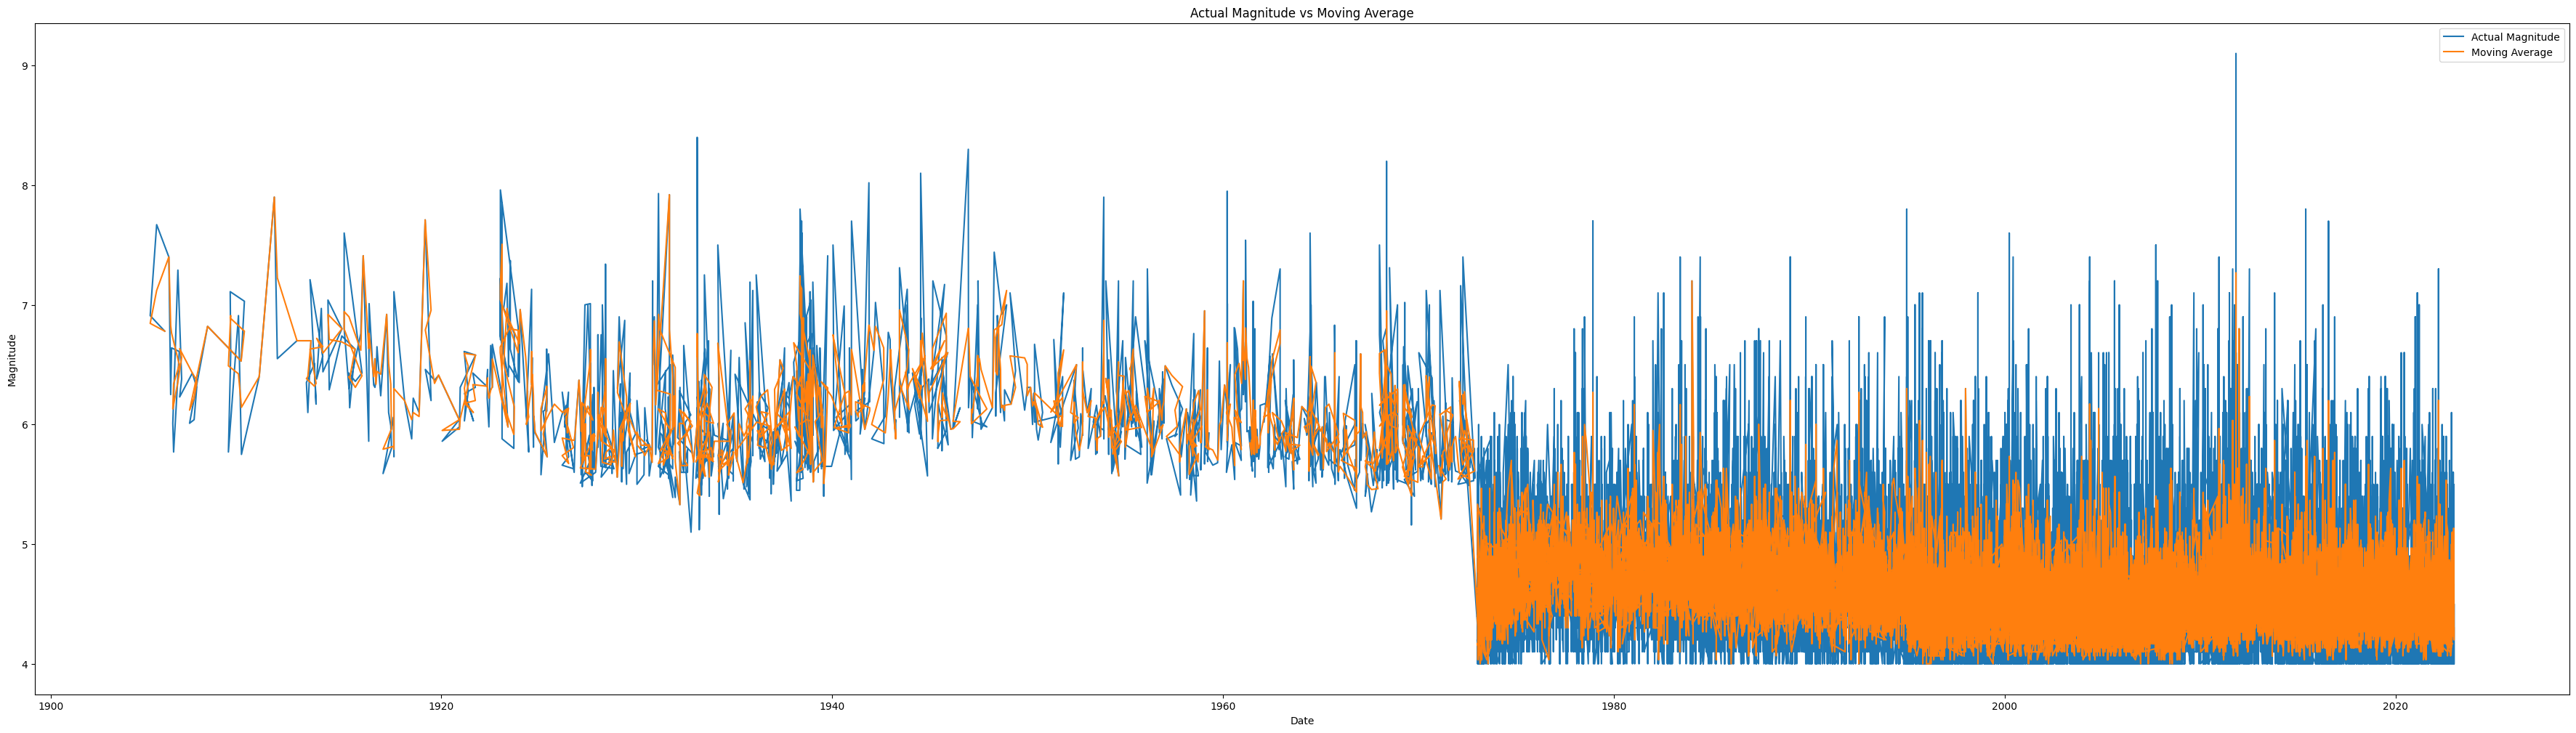

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(45, 12))  # Adjust the width and height as needed

# Plotting the actual magnitudes
plt.plot(df['Date'], df['mag'], label='Actual Magnitude')

# Plotting the moving average values
plt.plot(df['Date'], df['MovingAvgMag'], label='Moving Average')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Actual Magnitude vs Moving Average')
plt.legend()

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Calculate the evaluation metrics
mse = mean_squared_error(df['mag'], df['MovingAvgMag'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(df['mag'], df['MovingAvgMag'])
mape = mean_absolute_percentage_error(df['mag'], df['MovingAvgMag'])
r2 = r2_score(df['mag'], df['MovingAvgMag'])

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r2)


MSE: 0.10220754033148553
RMSE: 0.3196991403358563
MAE: 0.23281597772578227
MAPE: 0.04940615029687605
R-squared: 0.5874807054548492


Predicting till the year 2028

<ipython-input-15-dbc29a5f1fe0>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pred = df_pred.append(pd.DataFrame({'Year': future_years}))


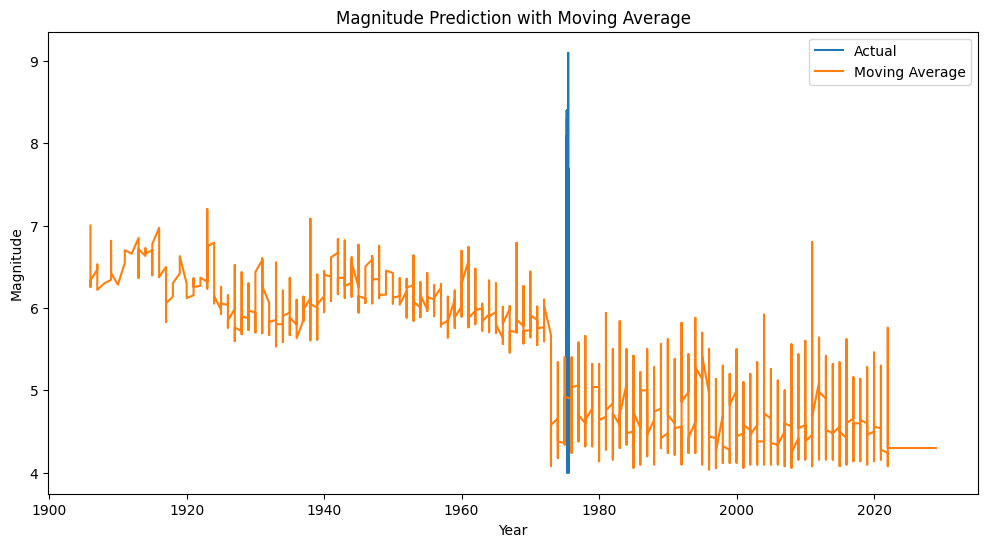

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute moving average
window_size = 5  # Adjust the window size as per your requirement
df['moving_average'] = df['mag'].rolling(window_size).mean()

# Create a new DataFrame for predictions until 2028
df_pred = df.copy()
df_pred['Year'] = pd.to_datetime(df_pred['Year'], format='%Y')
future_years = pd.date_range(start='2023-01-01', end='2028-12-31', freq='Y')
df_pred = df_pred.append(pd.DataFrame({'Year': future_years}))
df_pred['moving_average'] = df_pred['moving_average'].interpolate()

# Plotting the actual and predicted magnitudes
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['mag'], label='Actual')
plt.plot(df_pred['Year'], df_pred['moving_average'], label='Moving Average')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Magnitude Prediction with Moving Average')
plt.legend()
plt.show()
